In [224]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.np_utils import to_categorical #convert numbers to one-hot-encoding
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


import keras.backend as K
K.set_image_data_format('channels_last')
    
import matplotlib.pyplot as plt


In [225]:
import pandas as pd
train=pd.read_csv('digit-recognizer/train.csv')
test=pd.read_csv('digit-recognizer/test.csv')

In [226]:
import matplotlib.pyplot as plt
img=test.iloc[0].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.show()

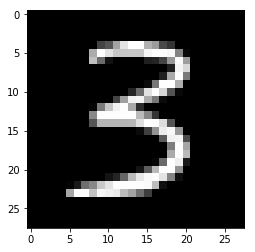

In [228]:
Y_train_orig=train['label']
X_train_orig=train.drop(labels='label',axis=1)

In [229]:
Y_train_orig=Y_train_orig.values.reshape((Y_train_orig.shape[0]))

In [230]:
from sklearn.model_selection import train_test_split
X_train_orig,X_val,Y_train_orig,Y_val = train_test_split(X_train_orig,Y_train_orig,test_size=0.1,random_state=2)

In [231]:
#Normalization
X_train_orig=X_train_orig.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
X_train=X_train_orig/225
X_test=test/255

In [168]:
#reshape
Y_train=to_categorical(Y_train_orig,num_classes=10)

# print(Y_train[:10])

In [169]:
Y_val=to_categorical(Y_val,num_classes=10)
X_val=X_val.values.reshape(-1,28,28,1)
X_val=X_val/225

In [175]:
print(Y_train.shape)

(37800, 10)


In [141]:
def digitRecognition(input_shape):
    x_input=Input(input_shape)
    x=ZeroPadding2D((3,3))(x_input)
    x=Conv2D(32,(7,7),strides=(1,1),name='conv0')(x)
    x=BatchNormalization(axis=3,name='bn0')(x)
    x=Activation('relu')(x)
    
    x=MaxPooling2D((2,2),name='max_pool')(x)
    x=Flatten()(x)
    x=Dense(10,activation='softmax',name='fc')(x)
    
    model=Model(input=x_input,output=x,name='digitRecognition')
    return model

In [136]:
digitR=digitRecognition((28,28,1))

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(name="digitRecognition", inputs=Tensor("in..., outputs=Tensor("fc...)`
  if sys.path[0] == '':


In [137]:
digitR.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [139]:
digitR.fit(x=X_train,y=Y_train,epochs=42,batch_size=200)

Epoch 1/42
37800/37800 [==============================] - 40s 1ms/step - loss: 0.1552 - acc: 0.9562
Epoch 2/42
37800/37800 [==============================] - 40s 1ms/step - loss: 0.0868 - acc: 0.9757
Epoch 3/42
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0625 - acc: 0.9820
Epoch 4/42
37800/37800 [==============================] - 41s 1ms/step - loss: 0.0498 - acc: 0.9865
Epoch 5/42
37800/37800 [==============================] - 40s 1ms/step - loss: 0.0421 - acc: 0.9874
Epoch 6/42
37800/37800 [==============================] - 40s 1ms/step - loss: 0.0362 - acc: 0.9894
Epoch 7/42
37800/37800 [==============================] - 39s 1ms/step - loss: 0.0312 - acc: 0.9909
Epoch 8/42
37800/37800 [==============================] - 39s 1ms/step - loss: 0.0273 - acc: 0.9917
Epoch 9/42
37800/37800 [==============================] - 40s 1ms/step - loss: 0.0238 - acc: 0.9934
Epoch 10/42
37800/37800 [==============================] - 40s 1ms/step - loss: 0.0219 - acc: 0.9932

In [149]:
print(Y_train.shape)

(37800, 10)


In [174]:
preds=digitR.evaluate(x=X_val,y=Y_val)
print()
print("loss="+str(preds[0]))
print("accuracy="+str(preds[1]))

4200/4200 [==============================] - 2s 485us/step

loss=0.06659436791860875
accuracy=0.9866666666666667


In [232]:
Y_test=digitR.predict(X_test)
Y_test=np.argmax(Y_test,axis=1)


In [242]:
Y_ans=pd.Series(Y_test,name='Label')


In [259]:
ans=pd.concat([pd.Series(range(1,Y_ans.shape[0]+1),name='ImageId'),Y_ans],axis=1)
print(ans[:10])

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3


In [264]:

submission=ans.to_csv('submission.csv')